In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
from exod.utils.plotting import use_scienceplots

In [2]:
use_scienceplots()

In [3]:
df_lc = pd.read_csv('/home/nkhan/EXOD2/data/results/0301730101/0301730101_0_50_2.0_12.0/lc_0.csv')
df_lc['t0'] = df_lc['time'] - df_lc['time'].min()

(35500.0, 36000.0)

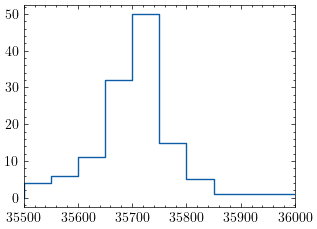

In [4]:
plt.step(df_lc['t0'], df_lc['n'])
plt.xlim(35500,36000)

/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/home/nkhan/EXOD2/venv/lib/python3.12/site-packages/numpy/ma/core.py:1044: RuntimeWarning: invalid value encountered in cast
  np.copyto(result, da, casting='unsafe', where=m)


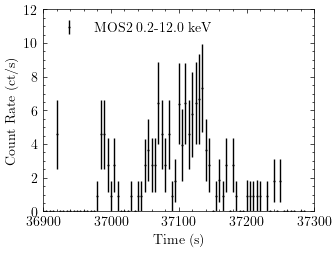

In [5]:
ts = ['0301730101_M2_dt5.0_src.lc', '0301730101_M2_dt5.0_bkg.lc', '0301730101_M2_dt5.0.lc']
t = ts[2]
tab = Table.read(t)
tab['t0'] = tab['TIME'] - tab['TIME'].min()
plt.errorbar(tab['t0'], tab['RATE'], yerr=tab['ERROR'], ls='none', lw=1.0, label='MOS2 0.2-12.0 keV', marker='.', color='black', markersize=1)
#plt.xlim(257955700, 257956100)
plt.xlim(36900,37300)
plt.ylim(0, 12)
plt.ylabel('Count Rate (ct/s)')
plt.xlabel('Time (s)')
plt.legend(loc='upper left')
plt.savefig('../../../data/plots/tornado_burst_lc_lccorr.png')
plt.savefig('../../../data/plots/tornado_burst_lc_lccorr.pdf')

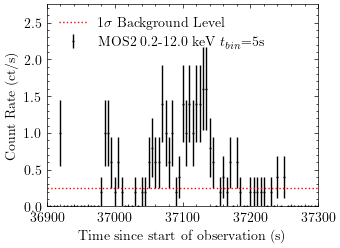

In [6]:
ts = ['0301730101_M2_dt5.0_src.lc', '0301730101_M2_dt5.0_bkg.lc', '0301730101_M2_dt5.0.lc']
t = ts[0]
tab = Table.read(t)
tab['t0'] = tab['TIME'] - tab['TIME'].min()
plt.errorbar(tab['t0'], tab['RATE'], yerr=tab['ERROR'], ls='none', lw=1.0, label=r'MOS2 0.2-12.0 keV $t_{bin}$=5s', marker='.', color='black', markersize=1)
plt.axhline(0.25, linestyle='dotted', color='red', label=r'$1\sigma$ Background Level')
#plt.xlim(257955700, 257956100)
plt.xlim(36900,37300)
plt.ylim(0,2.75)
plt.ylabel('Count Rate (ct/s)')
plt.xlabel('Time since start of observation (s)')
plt.legend(loc='upper left')
plt.savefig('../../../data/plots/tornado_burst_lc.png')
plt.savefig('../../../data/plots/tornado_burst_lc.pdf')

In [7]:
tabx_spec = []
tabxerr_spec = []
taby_spec = []
tabyerr_spec = []
tabymod_spec = []

taby_res = []

passed_to_resid = False
with open('../../../data/util/Spectrum.txt') as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith('NO'):
            passed_to_resid= True
        elif not (line.startswith('R') or line.startswith('!')or line.startswith('\n')):
            split = line.split(' ')
            if passed_to_resid:
                taby_res.append(float(split[2]))
            else:
                split = [float(elt) for elt in split]
                tabx_spec.append(split[0])
                tabxerr_spec.append(split[1])
                taby_spec.append(split[2])
                tabyerr_spec.append(split[3])
                tabymod_spec.append(split[4])

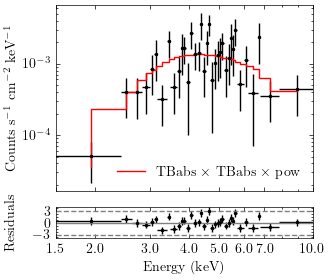

In [10]:
fig, (ax1,ax2) = plt.subplots(2,1, height_ratios=(6,1), sharex=True, figsize=(3.5, 3))
#c=cmr.take_cmap_colors(cmr.ocean, N=3, cmap_range=(0.1,0.6))
ax1.errorbar(tabx_spec, taby_spec, xerr=tabxerr_spec, yerr=tabyerr_spec, fmt='.',c='k', lw=1.0, markersize=3)
ax1.step(tabx_spec,tabymod_spec,c='red', lw=1.0, where='pre', label=r'TBabs $\times$ TBabs $\times$ pow')
ax1.loglog()
ax1.set_xlim(1.5,10)
ax1.legend()
ax1.set_ylabel(r"Counts s$^{-1}$ cm$^{-2}$ keV$^{-1}$")

ax2.errorbar(tabx_spec, taby_res, xerr=tabxerr_spec, yerr=1., fmt='.', c='k', lw=1.0, markersize=3)
ax2.axhline(y=0, c='grey', lw=1.0)
ax2.axhline(y=3, c='grey', ls='--', lw=1.0)
ax2.axhline(y=-3, c='grey', ls='--', lw=1.0)
ax2.set_ylim(-4,4)
ax2.set_yticks((-3,0,3))
ax2.semilogx()
ax2.set_xlim(1.5,10)
ax2.set_xlabel("Energy (keV)")
ax2.set_ylabel("Residuals")


xticks = [1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0]
xtickslab = [str(x) for x in xticks]

ax1.set_xticks(xticks)
ax1.set_xticklabels(xtickslab)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xtickslab)

fig.align_ylabels()
plt.tight_layout()
plt.savefig('../../../data/plots/tornado_burst_spec.pdf')

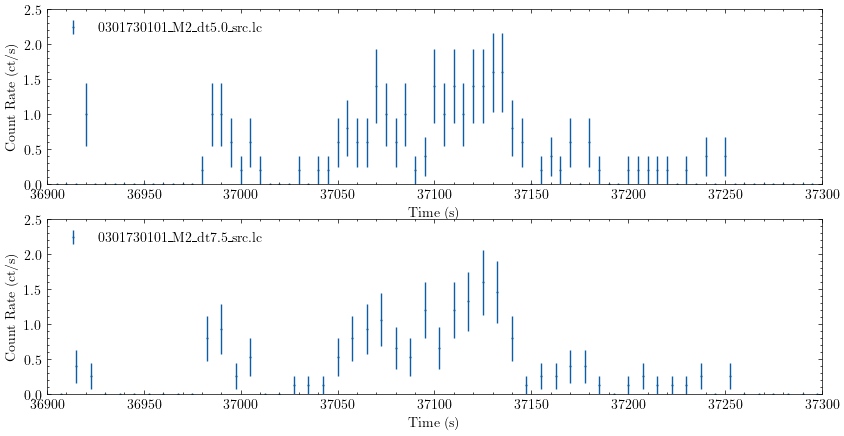

In [9]:
#ts = ['0301730101_M2_dt5.0_src.lc', '0301730101_M2_dt5.0_bkg.lc', '0301730101_M2_dt5.0.lc']
ts = ['0301730101_M2_dt5.0_src.lc', '0301730101_M2_dt7.5_src.lc']
fig, ax = plt.subplots(2,1, figsize=(10,5))
for i, t in enumerate(ts):
    tab = Table.read(t)
    tab['t0'] = tab['TIME'] - tab['TIME'].min()
    
    ax[i].errorbar(tab['t0'], tab['RATE'], yerr=tab['ERROR'], ls='none', lw=1.0, label=t, marker='.', markersize=1)
    #plt.xlim(257955700, 257956100)
    ax[i].set_xlim(36900,37300)
    ax[i].set_ylim(0, 2.5)
    ax[i].set_ylabel('Count Rate (ct/s)')
    ax[i].set_xlabel('Time (s)')
    ax[i].legend(loc='upper left')